# Název projektu
## 155UZPR - Katedra Geomatiky - Fsv ČVUT
### Tereza Černohousová - Matěj Klimeš
### ZS2024

In [ ]:
import fiona
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

## Load data using fiona

In [55]:
# nuts_name = "Katovice"
# with fiona.open('data250/PolbndMunDA.shp') as nuts:  
#     nuts_crs = nuts.crs
#     for feature in nuts:
#         if feature["properties"]["NAMN"] == nuts_name:
#             aoi = feature["geometry"]
#             break
#             
# nuts_crs, len(aoi.coordinates[0])

(CRS.from_epsg(5514), 76)

In [ ]:
# path to data
shapefile_path = 'data250/PolbndMunDA.shp'
# load shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

In [62]:
# Cesta k souboru shapefile
shapefile_path = 'data250/PolbndMunDA.shp'

# Načteme shapefile pomocí geopandas
gdf = gpd.read_file(shapefile_path)

# Zkontrolujeme souřadnicový systém
nuts_crs = gdf.crs
nuts_name = "Katovice"
filtered_gdf = gdf[gdf['NAMN'] == nuts_name]
filtered_gdf

aoi = filtered_gdf.geometry.iloc[0]
num_coords = len(aoi.exterior.coords)  # Počet bodů v polygonu
print(nuts_crs,',', num_coords)


EPSG:5514 , 76


In [63]:
filtered_gdf

,FCSUBTYPE,F_CODE,ICC,SHN0,SHN1,SHN2,SHN3,TAA,ICOB,NUTS3,ISN,NAMN,DESN,SHAPE_Leng,SHAPE_Area,geometry
1643,1,FA001,CZ,CZ0000000000,CZ0310000000,CZ0316000000,CZ0316551201,1,551201,CZ031,4605,Katovice,obec,14968.770733,9.556996e+06,"POLYGON ((-797932.225 -1124352.794, -797724.95..."


<Axes: >

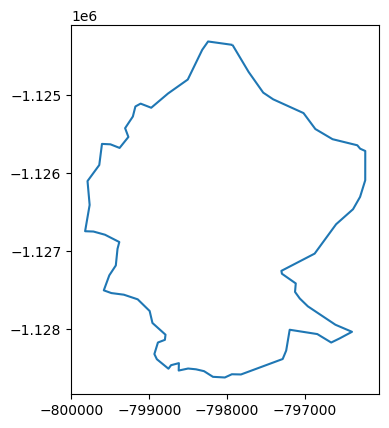

In [59]:
import geopandas as gpd
aoi_g = gpd.GeoSeries([aoi])
aoi_g.boundary.plot()

In [52]:
import requests

# URL REST služby
layer_url = "https://ags.cuzk.gov.cz/arcgis/rest/services/DATA250/MapServer/2/query"

# Parametry dotazu
params = {
    "where": "1=1",  # Dotaz na všechna data
    "outFields": "*",  # Zahrnout všechna pole
    "f": "geojson",  # Formát výstupu (geoJSON)
    "returnGeometry": "true"  # Zahrnout geometrii
}

# Poslat dotaz
response = requests.get(layer_url, params=params)

# Zkontrolovat, zda dotaz byl úspěšný
if response.status_code == 200:
    # Uložit data do souboru
    with open("Hranice_okresu.shp", "w", encoding="utf-8") as f:
        f.write(response.text)
    print("Data byla úspěšně stažena a uložena jako shapefile.")
else:
    print(f"Chyba při stahování dat: {response.status_code}")


Data byla úspěšně stažena a uložena jako shapefile.


   OBJECTID  FCSUBTYPE F_CODE ICC  BST  USE  USE_C  NA3  \
0         3          2  FA000  CZ    1    3    113  UNK   
1        10          2  FA000  CZ    1    3    113  UNK   
2        15          2  FA000  CZ    1    3    113  UNK   
3        16          2  FA000  CZ    1    3    113  UNK   
4        45          2  FA000  CZ    1    3    113  UNK   

                        ABID      SND  SHAPE_Length  \
0  CZ0641582328#CZ0646593567  5040000   3720.575900   
1  CZ0641581771#CZ0643582255  5040000   1526.490283   
2  CZ0641581844#CZ0643582255  5040000    290.368989   
3  CZ0641581381#CZ0643582255  5040000   1999.233975   
4  CZ0641581569#CZ0643581429  5040000   1871.067887   

                                            geometry  
0  LINESTRING (16.80771 49.31769, 16.81229 49.319...  
1  LINESTRING (16.46618 49.43661, 16.46514 49.434...  
2  LINESTRING (16.46777 49.43895, 16.46717 49.437...  
3  LINESTRING (16.48307 49.4246, 16.48157 49.4249...  
4  LINESTRING (16.73341 49.29378, 16.73

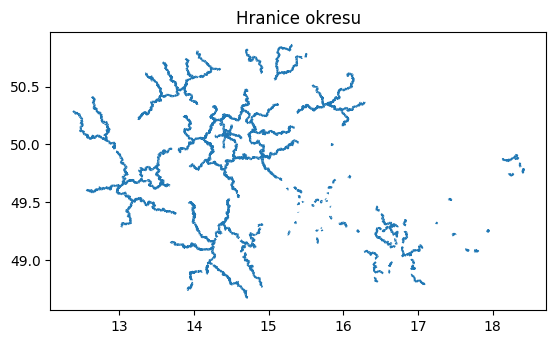

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Načíst shapefile nebo geojson do GeoDataFrame
gdf = gpd.read_file("Hranice_okresu.geojson")  # nebo "Hranice_okresu.geojson"

# Zobrazit základní statistiky a informace o datech
print(gdf.head())  # Prvních 5 řádků dat
print(gdf.crs)  # referenční systém (CRS)

# Zobrazení geometrie na mapě
gdf.plot()  # Vykreslí geometrie z GeoDataFrame
plt.title("Hranice okresu")
plt.show()  # Zobrazí obrázek s geometriemi
